In [10]:
import numpy as np
import pandas as pd
from glob import glob
import os
from datetime import datetime

In [ ]:
high_res_folder_name = 'D://FINO1Data/10Hz/'

files = glob(high_res_folder_name + '**/*.txt', recursive=True)

df = pd.DataFrame()
for file in files[0:2]:
    print(file)
    if not file.endswith('.txt'):
        continue
    df = pd.concat([df,pd.read_csv(file, sep=' ')])

df = df.reset_index(drop = True)
df.columns = df.columns.str.replace('(', '_', regex=False)
df.columns = df.columns.str.replace(')', '', regex=False)
df['datetime'] = pd.to_datetime(df['Date'] + ' ' +  df['Time']) 
df = df.drop(columns=['Date','Time'])

if not os.path.exists('../02Data'):
    os.makedirs('../02Data')
    
df.to_pickle('../02Data/10hz_data')
df.columns

D://FINO1Data/10Hz\200601\FINO_MGC__2006_01_01_00_00.txt
D://FINO1Data/10Hz\200601\FINO_MGC__2006_01_01_00_10.txt


Index(['vh_80', 'vh_60', 'vh_40', 'dir_80', 'dir_60', 'dir_40', 'u_80', 'v_80',
       'w_80', 'T_80', 'u_60', 'v_60', 'w_60', 'T_60', 'u_40', 'v_40', 'w_40',
       'T_40', 'datetime'],
      dtype='object')

In [ ]:
high_res_folder_name = '/mnt/csl/datasets/ARS-NEPTUNE/BBDD/FINO1Data/10min/'

files = glob(high_res_folder_name + '**/*.dat', recursive=True)

df = pd.DataFrame()
for file in files[:]:
    parameter = file.split('_')[1]
    altitude = file.split('_')[2]
    if altitude[-1] != 'm':
        altitude = file.split('_')[3][:-1]
    else:
        altitude = file.split('_')[2][:-1]
    col_name = f'{parameter}_{altitude}'
    df_aux = pd.read_csv(file, sep='\t', skiprows=[0,1,2,3,5], encoding='latin1')
    df[col_name] = df_aux['Value']
    print(file)
    print(df_aux.shape)
df['datetime'] = pd.to_datetime(pd.to_datetime(df_aux['Time']))

if not os.path.exists('../02Data'):
    os.makedirs('../02Data')
    
df.to_pickle('../../02Data/10min_data')
df

/mnt/csl/datasets/ARS-NEPTUNE/BBDD/FINO1/10min/200606/FINO1_winddirection_vane_91m_315deg_20060601_20060831.dat
(13249, 4)
/mnt/csl/datasets/ARS-NEPTUNE/BBDD/FINO1/10min/200606/FINO1_windspeed_cup_41m_142deg_20060601_20060831.dat
(13249, 6)
/mnt/csl/datasets/ARS-NEPTUNE/BBDD/FINO1/10min/200606/FINO1_windspeed_usa_82m_311deg_20060601_20060831.dat
(13249, 6)
/mnt/csl/datasets/ARS-NEPTUNE/BBDD/FINO1/10min/200606/FINO1_airtemperature_34m_20060601_20060831.dat
(13249, 3)
/mnt/csl/datasets/ARS-NEPTUNE/BBDD/FINO1/10min/200606/FINO1_winddirection_vane_71m_307deg_20060601_20060831.dat
(13249, 4)
/mnt/csl/datasets/ARS-NEPTUNE/BBDD/FINO1/10min/200606/FINO1_windspeed_cup_51m_140deg_mc_20060601_20060831.dat
(13249, 6)
/mnt/csl/datasets/ARS-NEPTUNE/BBDD/FINO1/10min/200606/FINO1_winddirection_usa_42m_308deg_20060601_20060831.dat
(13249, 4)
/mnt/csl/datasets/ARS-NEPTUNE/BBDD/FINO1/10min/200606/FINO1_windspeed_cup_91m_135deg_mc_20060601_20060831.dat
(13249, 6)
/mnt/csl/datasets/ARS-NEPTUNE/BBDD/FINO1/1

,winddirection_91,windspeed_41,windspeed_82,airtemperature_34,winddirection_71,windspeed_51,winddirection_42,windspeed_91,relativehumidity_34,precipitation_24,...,uvradiation_34,uvradiation_93,airpressure_21,airtemperature_42,relativehumidity_52,airpressure_92,winddirection_34,airtemperature_52,windspeed_34,datetime
0,216.4,11.41,0.00,-999.00,216.26,11.38,0.00,12.15,99.84,-999,...,-999,-999,991.00,6.69,-999.00,-999,216.6,6.41,11.44,2006-01-01 00:00:00
1,214.5,11.37,11.55,6.76,214.49,11.35,213.55,11.94,99.84,-999,...,-999,-999,991.00,6.61,98.85,-999,214.5,6.35,11.36,2006-01-01 00:10:00
2,211.8,11.55,11.89,6.61,211.75,11.57,210.79,12.15,99.80,-999,...,-999,-999,991.00,6.47,98.85,-999,211.6,6.20,11.53,2006-01-01 00:20:00
3,208.0,10.94,11.44,6.52,208.31,10.99,208.31,11.64,99.83,-999,...,-999,-999,991.00,6.39,98.85,-999,209.5,6.12,10.97,2006-01-01 00:30:00
4,206.8,11.36,11.77,6.46,206.92,11.44,205.89,11.88,99.84,-999,...,-999,-999,991.00,6.34,98.85,-999,207.0,6.06,11.31,2006-01-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13244,201.4,10.55,12.97,7.41,201.06,11.11,198.34,13.50,95.82,-999,...,-999,-999,1000.94,7.49,92.43,-999,198.1,9.71,10.02,2006-04-02 23:20:00
13245,201.8,10.47,12.84,7.38,200.90,11.05,197.66,13.29,96.11,-999,...,-999,-999,1000.92,7.50,93.17,-999,196.5,9.69,10.01,2006-04-02 23:30:00
13246,202.0,10.68,13.21,-999.00,201.03,11.29,196.71,13.53,97.09,-999,...,-999,-999,1000.89,7.63,94.41,-999,195.6,9.75,10.09,2006-04-02 23:40:00
13247,200.1,9.66,12.37,7.35,199.13,10.31,195.66,12.81,97.70,-999,...,-999,-999,1000.94,7.49,95.31,-999,194.8,9.77,9.10,2006-04-02 23:50:00


In [17]:
pd.to_datetime(df_aux['Time'])

0       2006-01-01 00:00:00
1       2006-01-01 00:10:00
2       2006-01-01 00:20:00
3       2006-01-01 00:30:00
4       2006-01-01 00:40:00
                ...        
52556   2006-12-31 23:20:00
52557   2006-12-31 23:30:00
52558   2006-12-31 23:40:00
52559   2006-12-31 23:50:00
52560   2007-01-01 00:00:00
Name: Time, Length: 52561, dtype: datetime64[ns]

In [163]:
# COMPUTE OBUKHOV LENGTH

# Function to obtain friction velocity
def compute_friction_velocity(u, v, w):
    up = u - np.mean(u)
    vp = v - np.mean(v)
    wp = w - np.mean(w)
    uw = up*wp
    vw = vp*wp
    u_a = (np.mean(uw)**2 + np.mean(vw)**2)**(1/4)

    return u_a

def compute_mixing_ratio(rh, t, p):
    # Convert temperature to Celsius
    t_c = t - 273.15
    
    # Saturation vapor pressure in hPa
    e_s = 6.112 * np.exp(17.67 * t_c / (t_c + 243.5))
    
    # Actual vapor pressure
    e = rh / 100 * e_s
    
    # Mixing ratio
    r = 0.622 * e / (p - e)  # kg/kg
    return r

def compute_virtual_temperature(t, r):
    # Convert temperature to Celsius
    t_v = t*(1+0.61*r)

    return t_v

def compute_virtual_potential_temperature(t, rh, p, p0 = 1000):

    # Compute mixing ratio
    r = compute_mixing_ratio(rh, t, p)

    # Compute virtual temperature
    t_v = compute_virtual_temperature(t,r)

    # Gas constant for dry air
    Rd = 287 # J/(kg K)

    # Specific heat at constant pressure
    cp = 1005 # J/(kg K)

    # Compute the potential temperature
    vpt = t_v*(p0/p)**(Rd/cp)

    return vpt

def compute_obukhov_length(u, v, w, t, rh, p, p0 = 1000):

    # Von Karman constant
    k = 0.4

    # Gravitational acceleration
    g = 9.81

    # Compute friction velocity
    u_a = compute_friction_velocity(u, v, w)
    
    # Compute virtual potential temperature
    vpt = compute_virtual_potential_temperature(t, rh, p, p0)

    # Compute kinematic heat flux
    vpt_p = vpt - np.mean(vpt)
    w_p = w - np.mean(w)
    khf = np.mean(vpt_p * w_p)

    # Compute Obukhov length
    L = - (u_a**3 * np.mean(vpt)) / (k * g * khf)

    return L

def process_df_obukhov_length(df_min, df_s):
    
    df_s_aux = df_s.copy()
    df_s_aux.set_index("datetime", inplace=True)
    df_min_aux = df_min.set_index('datetime')

    groups = df_s_aux.groupby(pd.Grouper(freq="10min"))
    print(len(groups))
    
    df_out = pd.DataFrame()
    for time_bin, segment in groups:
        try:
            u = segment['u_40']
            v = segment['v_40']
            w = segment['w_40']
            t = segment['T_40']

            df_min_segment = df_min_aux.loc[time_bin]
            rh = df_min_segment['relativehumidity_34']
            p = df_min_segment['airpressure_21']

            L = compute_obukhov_length(u, v, w, t, rh, p)
            df_min_segment['L'] = L
            df_out = pd.concat([df_out,df_min_segment], axis=1)
        except:
            continue
    
    return df_out

In [164]:
df_min = pd.read_pickle('../02Data/10min_data')
df_s = pd.read_pickle('../02Data/10hz_data')
process_df_obukhov_length(df_min, df_s)

2


C:\Users\andreu.salcedo\AppData\Local\Temp\ipykernel_19504\3201758386.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_segment['L'] = L
C:\Users\andreu.salcedo\AppData\Local\Temp\ipykernel_19504\3201758386.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min_segment['L'] = L
C:\Users\andreu.salcedo\AppData\Local\Temp\ipykernel_19504\3201758386.py:100: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat o

,2006-01-01
airpressure_21,991.000000
airpressure_92,-999.000000
airtemperature_101,-999.000000
airtemperature_34,-999.000000
airtemperature_42,6.690000
airtemperature_52,6.410000
airtemperature_72,6.160000
globalradiation_34,-999.000000
globalradiation_93,-999.000000
precipitation_101,-999.000000


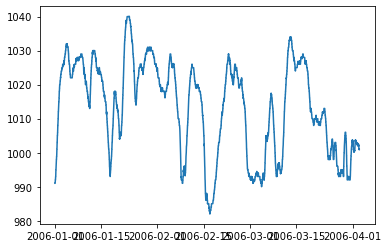

In [9]:
df_min = pd.read_pickle('../../02Data/10min_data')
import matplotlib.pyplot as plt
plt.plot(df_min['datetime'],df_min['airpressure_21'])